## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis'

In [4]:
df = pd.read_csv(r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Prepared Data/df_world.csv', index_col = False)

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_world.csv'), index_col = False)

In [6]:
df.columns

Index(['Unnamed: 0', 'Location', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material',
       'Number of views last 7 days'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Location,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days
0,0,Switzerland,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,226
1,1,Germany,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75
2,2,Switzerland,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124
3,3,Denmark,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,64
4,4,Germany,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58


In [8]:
scaler = StandardScaler()

In [9]:
#Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [10]:
df_numerical = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days']]

In [11]:
df_numerical.head(20)

,Year Built,Length,Width,Number of views last 7 days
0,2017,4.00,1.90,226
1,2020,4.00,1.50,75
2,0,3.69,1.42,124
3,2020,3.00,1.00,64
4,2019,3.55,1.46,58
5,0,4.03,1.56,132
6,1999,6.20,2.38,474
7,0,3.00,2.50,134
8,2019,3.64,1.37,45
9,2018,4.35,1.73,180


In [12]:
df['Year Built'] = (df['Year Built'] - df['Year Built'].mean()) / df['Year Built'].std()

In [13]:
print(df['Year Built'].head())

0    0.269154
1    0.275666
2   -4.108783
3    0.275666
4    0.273495
Name: Year Built, dtype: float64


## Standarize Data

In [14]:
df['Length'] = (df['Length'] - df['Length'].mean()) / df['Length'].std()

In [15]:
df['Width'] = (df['Width'] - df['Width'].mean()) / df['Width'].std()

In [16]:
df['Number of views last 7 days'] = (df['Number of views last 7 days'] - df['Number of views last 7 days'].mean()) / df['Number of views last 7 days'].std()

## Elbow Technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

In [19]:
# Choose the number of clusters you want to use
kmeans = [KMeans(n_clusters=i) for i in range(1, 10)]

In [20]:
# Fit the k-means model and get the score
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]

In [21]:
score

[-80427786994.23212,
 -20094175747.01754,
 -8868040001.941963,
 -5023517639.438195,
 -3213861079.457009,
 -2219287873.517137,
 -1641087032.1621332,
 -1256379845.214496,
 -987023329.9514261]

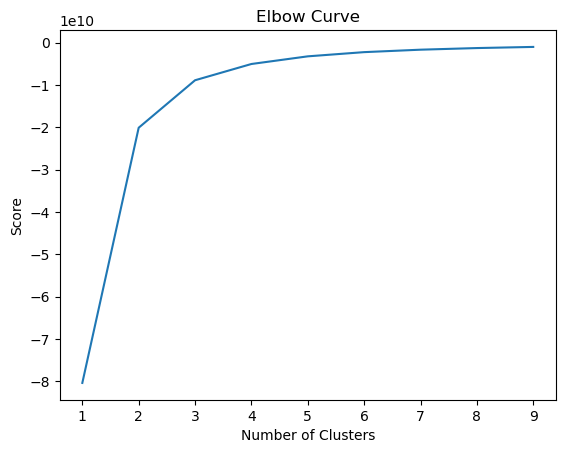

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## there's a large jump from one to three on the x-axis, there is a slight more increase after but then the curve straightens out. Therefore I chose to go with 3.

## K-Means Algorithm

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)



In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_numerical)

KMeans(n_clusters=3)

In [28]:
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

In [29]:
df_numerical.head()

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days,clusters
0,0,0.269154,-1.371272,-1.390740,0.509588,1
1,1,0.275666,-1.371272,-1.740469,-0.487270,1
2,2,-4.108783,-1.428535,-1.810415,-0.163786,1
3,3,0.275666,-1.555993,-2.177630,-0.559889,1
4,4,0.273495,-1.454396,-1.775442,-0.599499,1


In [30]:
df_numerical['clusters'].value_counts()

1    3303
0    3272
2    3272
Name: clusters, dtype: int64

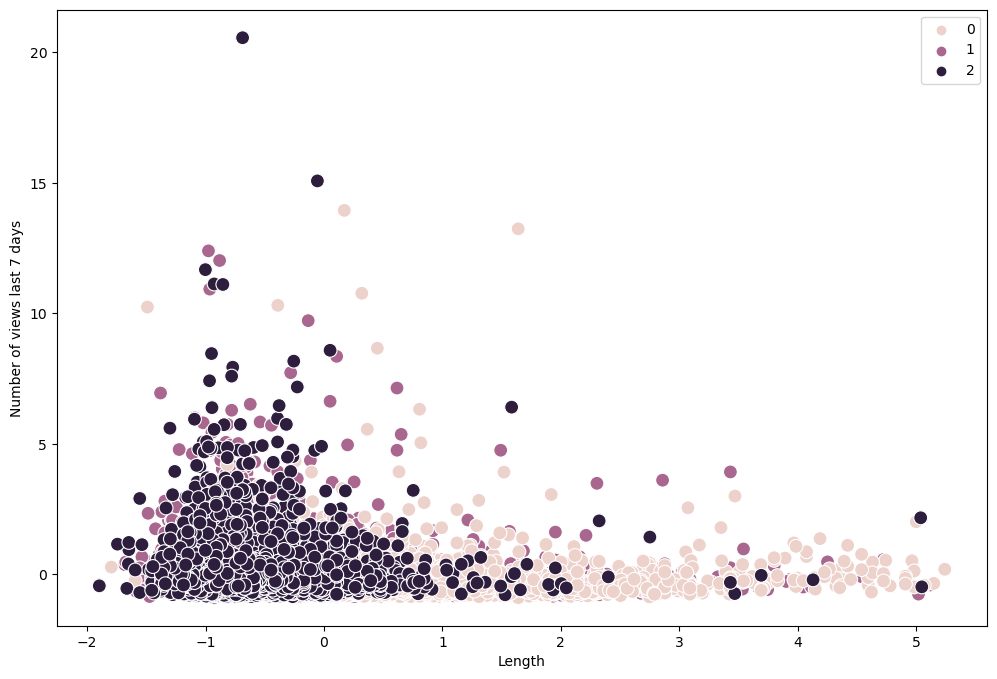

In [35]:
# Plot the clusters for the "Length and "Number of views last 7 days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Length'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Number of views last 7 days') # Label y-axis.
plt.show()

## I chose to make a plot of number of views last 7 days and length. These make sense because just as in previous analysis we see that a lot of views are given to yachts with smaller length. However, the negative in the length is not logical.

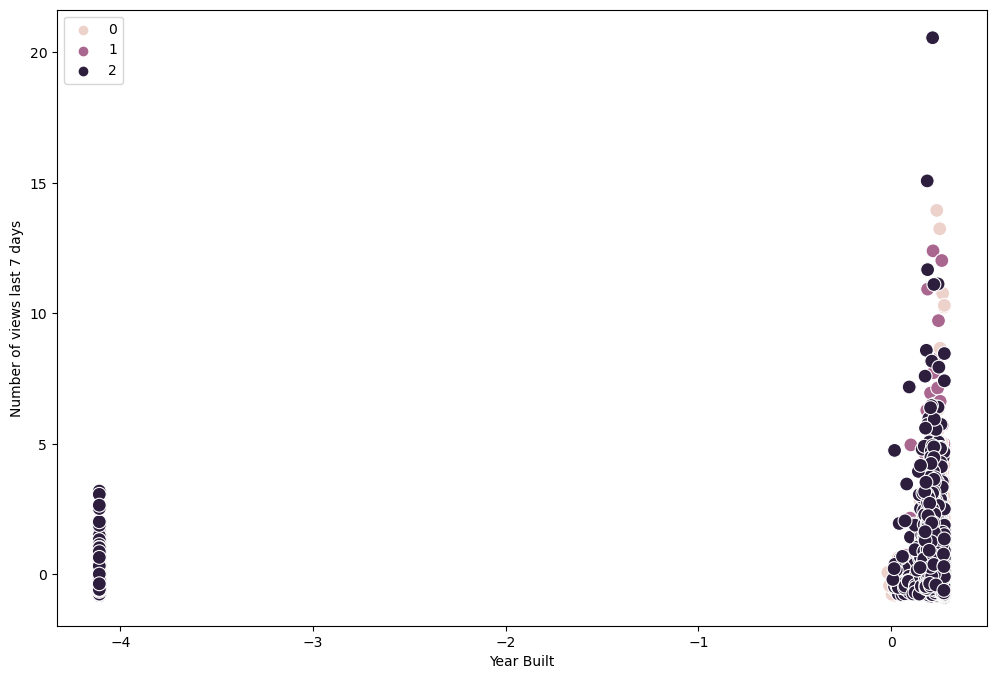

In [38]:
# Plot the clusters for the "Year Built" and "Number of views last 7 days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Year Built'], y=df_numerical['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Number of views last 7 days') 
plt.show()

## I have chose to put the year built and number of views in the last 7 days against each other. The analysis did not result in accuracy. Therefore, a different type of analysis will need to be conducted to drive accurate results.

In [42]:
df_numerical.groupby('clusters').agg({'Year Built':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Width':['mean', 'median'],
                          'Number of views last 7 days':['mean', 'median']})

Year Built              Length               Width            \
               mean    median      mean    median      mean    median   
clusters                                                                
0          0.083966  0.249620  0.643597  0.426990  0.663783  0.620203   
1          0.004617  0.247449 -0.038412 -0.257403 -0.030309 -0.166688   
2         -0.088627  0.240938 -0.604821 -0.724747 -0.633187 -0.822430   

         Number of views last 7 days            
                                mean    median  
clusters                                        
0                          -0.187092 -0.365138  
1                          -0.005573 -0.276015  
2                           0.192718 -0.143981

## Predictive modeling: The results of the clustering analysis can be used as a new feature in a predictive model. For example, we can build a regression model to predict the price of a property based on its features and the cluster it belongs to.